<a href="https://colab.research.google.com/github/DANGKHOIk22/data-science/blob/main/21_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import spacy
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
true = pd.read_csv('/content/True.csv')
fake=pd.read_csv('/content/Fake.csv')

<ipython-input-10-504449c3ca0a>:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  fake=pd.read_csv('/content/Fake.csv')


In [ ]:
fake=fake.iloc[:,0:4]

In [ ]:
fake=fake.dropna()
true=true.dropna()

In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,Middle-east,31-Dec-17
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,Middle-east,31-Dec-17
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",Middle-east,30-Dec-17
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",Middle-east,29-Dec-17
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,Middle-east,25-Dec-17


In [ ]:
fake['subject'].value_counts()

Middle-east        2469
left-news          1106
politics            889
News                859
Government News     786
Name: subject, dtype: int64

In [ ]:
true=true.drop('label',axis=1)
true['category']=0
fake['category']=1

In [ ]:
fake

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,Middle-east,31-Dec-17,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,Middle-east,31-Dec-17,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",Middle-east,30-Dec-17,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",Middle-east,29-Dec-17,1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,Middle-east,25-Dec-17,1
...,...,...,...,...,...
6104,One Of the Biggest Geniuses Ever Issues A War...,Astrophysicist Stephen Hawking is internationa...,left-news,30-May-16,1
6105,Let’s Compare President Obama’s Memorial Day ...,The mere thought that Donald Trump could succe...,left-news,30-May-16,1
6106,Rosie O’Donnell Retitles The News To More Hon...,As much as he and his supporters want to say t...,left-news,30-May-16,1
6107,Fly Over Shows May 12 Gulf Oil Spill Far Wors...,"Shell admits to spilling 90,000 gallons of oil...",left-news,30-May-16,1


In [ ]:
df=pd.concat([true,fake]).reset_index(drop=True)

In [ ]:
df.tail()

,title,text,subject,date,category
11103,One Of the Biggest Geniuses Ever Issues A War...,Astrophysicist Stephen Hawking is internationa...,left-news,30-May-16,1
11104,Let’s Compare President Obama’s Memorial Day ...,The mere thought that Donald Trump could succe...,left-news,30-May-16,1
11105,Rosie O’Donnell Retitles The News To More Hon...,As much as he and his supporters want to say t...,left-news,30-May-16,1
11106,Fly Over Shows May 12 Gulf Oil Spill Far Wors...,"Shell admits to spilling 90,000 gallons of oil...",left-news,30-May-16,1
11107,Trump Responds To Third-Party Candidate The O...,"On Sunday, Weekly Standard editor Bill Kristol...",left-news,30-May-16,1


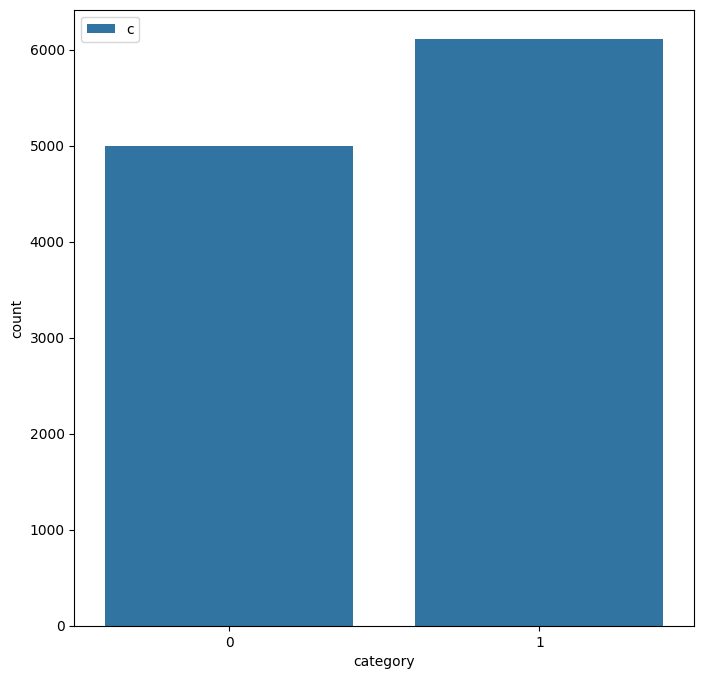

In [ ]:
%matplotlib inline

plt.figure(figsize=(8,8))
sns.countplot(df,x='category')
plt.legend('category')

<Axes: xlabel='subject', ylabel='count'>

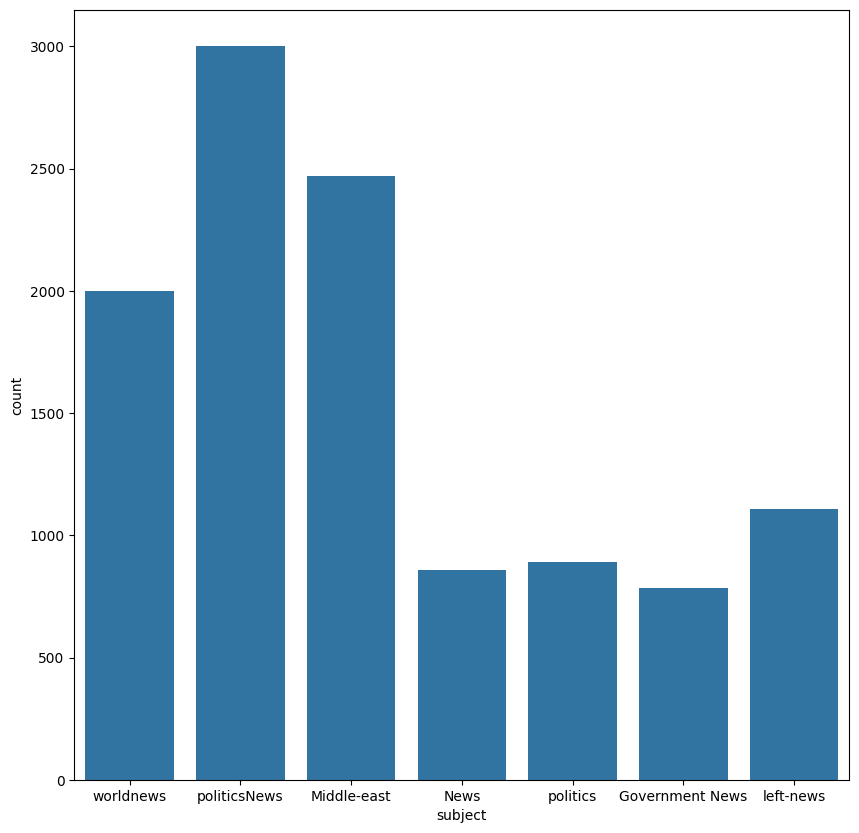

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(df,x='subject')

In [ ]:
df.isna().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [ ]:
df=df[['text','category']]

In [ ]:
df

,text,category
0,WASHINGTON (Reuters) - The head of a conservat...,0
1,WASHINGTON (Reuters) - Transgender people will...,0
2,WASHINGTON (Reuters) - The special counsel inv...,0
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0
...,...,...
11103,Astrophysicist Stephen Hawking is internationa...,1
11104,The mere thought that Donald Trump could succe...,1
11105,As much as he and his supporters want to say t...,1
11106,"Shell admits to spilling 90,000 gallons of oil...",1


In [ ]:
blanks=[]
for index,text in df['text'].items():
  if text.isspace():
    blanks.append(index)
print(len(blanks))

0


In [ ]:
df.drop(blanks,inplace=True)

In [ ]:
df.shape

(11108, 2)

In [ ]:
nlp=spacy.load("en_core_web_sm")

In [ ]:
lemma=WordNetLemmatizer()

In [ ]:
nltk.download('wordnet')
print("rocks :", lemma.lemmatize("rocks"))

[nltk_data] Downloading package wordnet to /root/nltk_data...


rocks : rock


In [ ]:
list1=nlp.Defaults.stop_words
print(len(list1))
list2=stopwords.words('english')
print(len(list2))
Stopwords=set(set(list1)|set(list2))

326
179


In [ ]:
Stopwords

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'ain',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'aren',
 "aren't",
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except

In [ ]:
def clean_text(text):

    """
    It takes text as an input and clean it by applying several methods

    """

    string = ""

    #lower casing
    text=text.lower()

    #simplifying text
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve"," have",text)
    text=re.sub(r"\'re"," are",text)
    text=re.sub(r"\'d"," would",text)
    text=re.sub(r"won't","will not",text)
    text=re.sub(r"can't","cannot",text)

    #removing any special character
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub('[^A-Za-z0-9]+',' ', text)

    for word in text.split():
        if word not in Stopwords:
            string+=lemma.lemmatize(word)+" "

    return string

In [ ]:
df["text"]=df["text"].apply(clean_text)

In [ ]:
df["text"]

0        washington reuters head conservative republica...
1        washington reuters transgender people allowed ...
2        washington reuters special counsel investigati...
3        washington reuters trump campaign adviser geor...
4        seattle washington reuters president donald tr...
                               ...                        
11103    astrophysicist stephen hawking internationally...
11104    mere thought donald trump succeed president ob...
11105    supporter want medium donald trump clearly tru...
11106    shell admits spilling 90 000 gallon oil gulf m...
11107    sunday weekly standard editor bill kristol tea...
Name: text, Length: 11108, dtype: object

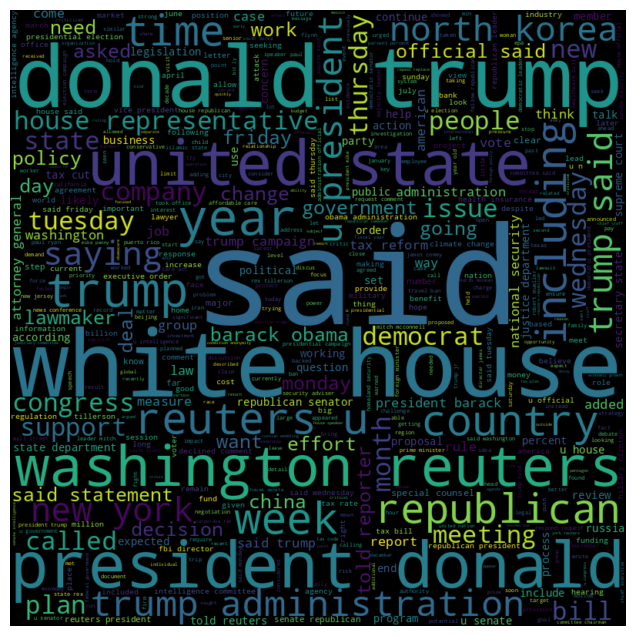

In [ ]:
plt.figure(figsize=(8,8))
Wc=WordCloud(max_words=500,width=800,height=800).generate(" ".join(df[df['category']==0].text))
plt.axis("off")
plt.imshow(Wc,interpolation="bilinear")

In [ ]:
from sklearn.model_selection import train_test_split

x=df['text']
y=df['category']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3,stratify=y)

In [ ]:
vectorizer=TfidfVectorizer()
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
test_clf=Pipeline(([("tfidf",TfidfVectorizer()),("clf",LinearSVC())]))
test_clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [ ]:
prediction=test_clf.predict(x_test)


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1500
           1       1.00      1.00      1.00      1833

    accuracy                           1.00      3333
   macro avg       1.00      1.00      1.00      3333
weighted avg       1.00      1.00      1.00      3333



**bold text**